Training Set Accuracy: 96.65%
Test Set Accuracy: 72.00%
Incorrectly predicted indices in the test set: [ 5  6 10 11 13 18 19 28 29 30 33 34 44 46]


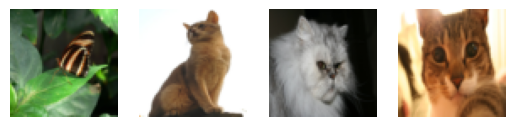

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  # To handle .h5 files

# Specify the file paths
train_path = r"C:\Users\DELL\Documents\2024 AMS 595\hw6\train_catvnoncat.h5"
test_path = r"C:\Users\DELL\Documents\2024 AMS 595\hw6\test_catvnoncat.h5"

# Load the original dataset
def load_data(train_path, test_path):
    """
    Load the training and test datasets from .h5 files.
    Args:
        train_path: Path to the training .h5 file.
        test_path: Path to the test .h5 file.
    Returns:
        X_train, Y_train: Training data and labels.
        X_test, Y_test: Test data and labels.
    """
    train_dataset = h5py.File(train_path, 'r')
    test_dataset = h5py.File(test_path, 'r')
    X_train = np.array(train_dataset["train_set_x"][:])  # Training features
    Y_train = np.array(train_dataset["train_set_y"][:])  # Training labels
    X_test = np.array(test_dataset["test_set_x"][:])     # Test features
    Y_test = np.array(test_dataset["test_set_y"][:])     # Test labels
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = load_data(train_path, test_path)

# Preprocessing the data
def preprocess_data(X_train, X_test):
    """
    Normalize the dataset by dividing by 255 and reshaping.
    """
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    X_train = X_train.reshape(X_train.shape[0], -1).T
    X_test = X_test.reshape(X_test.shape[0], -1).T
    return X_train, X_test

X_train, X_test = preprocess_data(X_train, X_test)
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression model
def logistic_regression(X, Y, num_epochs, learning_rate):
    """
    Train logistic regression using gradient descent.
    """
    m = X.shape[1]
    n = X.shape[0]
    w = np.zeros((n, 1))  # Initialize weights
    b = 0  # Initialize bias

    for epoch in range(num_epochs):
        # Forward propagation
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)

        # Compute gradients
        dw = np.dot(X, (A - Y).T) / m
        db = np.sum(A - Y) / m

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

# Train the model
num_epochs = 1000
learning_rate = 0.005
w, b = logistic_regression(X_train, Y_train, num_epochs, learning_rate)

# Predict function
def predict(X, w, b):
    """
    Predict using the logistic regression model.
    """
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# Compute accuracies
Y_pred_train = predict(X_train, w, b)
Y_pred_test = predict(X_test, w, b)
train_accuracy = np.mean(Y_pred_train == Y_train) * 100
test_accuracy = np.mean(Y_pred_test == Y_test) * 100

print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Test Set Accuracy: {test_accuracy:.2f}%")

# Display incorrectly classified images
incorrect_indices = np.where(Y_pred_test != Y_test)[1]
print(f"Incorrectly predicted indices in the test set: {incorrect_indices}")

def display_images(X, indices):
    """
    Display images from the dataset.
    """
    for i, idx in enumerate(indices[:4]):
        plt.subplot(1, 4, i + 1)
        plt.imshow(X[:, idx].reshape(64, 64, 3))
        plt.axis('off')
    plt.show()

display_images(X_test, incorrect_indices)
